## Simple example script illustrating object detection
This notebook is one of the most simplest examples how to use DeGirum PySDK to do AI inference of a graphical file using  object detection model.

This script works with the following inference options:

1. [DeGirum Cloud Platform](cs.degirum.com),
1. DeGirum-hosted AI server node shared via Peer-to-Peer VPN,
1. AI server node hosted by you in your local network,
1. AI server running on your local machine,
1. DeGirum ORCA accelerator directly installed on your local machine.

To try different options, you just need to change the `inference_option` in the code below. 

### Specify where do you want to run your inferences

In [1]:
inference_option = 1  # <<< change it according to your needs selecting from the list in the header comment

### The rest of the cells below should run without any modifications

In [2]:
import degirum as dg # import DeGirum PySDK
import mytools

In [3]:
# connect to model zoo according to selected inference option
zoo = mytools.connect_model_zoo(inference_option)

Inference option = 'DeGirum Cloud Platform


In [ ]:
# list all AI models available for inference
zoo.list_models()

In [4]:
# load AI model 'ssd_mobilenet_v2' for DeGirum Orca AI accelerator
# (change model name to "...n2x_cpu_1" to run it on CPU)
model = zoo.load_model("mobilenet_v2_ssd_coco--300x300_quant_n2x_orca_1")

In [5]:
# configure some result visualization parameters (optional step)
model.image_backend = "pil" # use PIL as image rendering backend
model.overlay_show_probabilities = True # show class probabilities on overlay image
model.overlay_font_scale = 1.5 # increase font size for overlay image labels
model.overlay_alpha = 1 # set minimum transparency for overlay image labels

In [6]:
# perform AI model inference on given image file (assuming current direcory is where this notebook is located)
res = model("./images/TwoCats.jpg")

- label: cat
  score: 0.8949445486068726
  category_id: 16
  bbox: [229.6606081724167, 35.471698969602585, 372.242219209671, 390.52829468250275]
- label: cat
  score: 0.8703710436820984
  category_id: 16
  bbox: [77.4733756184578, 34.00069499015808, 249.1107097864151, 347.6342500448227]



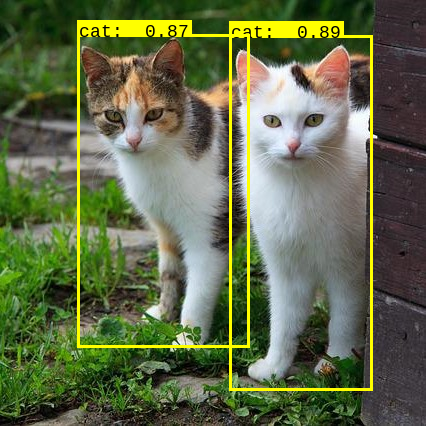

In [7]:
# show results of inference
print(res) # numeric results
res.image_overlay # graphical results